In [1]:
## import the file US accidents and name it accidents and set Start time and end time columns as parse dates for for resample method##
## import liabraries as seaborn and matplotlib and statmodels for some graphis use and statistical use##
import pandas as pd
accidents=pd.read_csv('US_Accidents_Dec19.csv',parse_dates=['Start_Time','End_Time'])
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.options.display.max_columns= None
accidents.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [2]:
## checkind data types of colums ##
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float

In [3]:
## checking missing values in the columns##
accidents.isnull().sum()

ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2246264
End_Lng                  2246264
Distance(mi)                   0
Description                    1
Number                   1917605
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      880
Country                        0
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitat

In [4]:
## dropping unnecessary columns ##
accidents.drop(['Source','Give_Way','Airport_Code','Start_Lat','Start_Lng','End_Lat','End_Lng','Side','Street','TMC','Number','Side','Description','Wind_Direction','Wind_Chill(F)','Precipitation(in)','Astronomical_Twilight','Nautical_Twilight','Civil_Twilight','Distance(mi)','Zipcode','Wind_Speed(mph)','Timezone','Pressure(in)','Weather_Timestamp'],axis=1, inplace=True)

In [5]:
## list of columns after dropping unnecessary columns##
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 25 columns):
ID                   object
Severity             int64
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
City                 object
County               object
State                object
Country              object
Temperature(F)       float64
Humidity(%)          float64
Visibility(mi)       float64
Weather_Condition    object
Amenity              bool
Bump                 bool
Crossing             bool
Junction             bool
No_Exit              bool
Railway              bool
Roundabout           bool
Station              bool
Stop                 bool
Traffic_Calming      bool
Traffic_Signal       bool
Turning_Loop         bool
Sunrise_Sunset       object
dtypes: bool(12), datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 329.0+ MB


In [ ]:
## now we willdo some descriptve analysis ##

In [ ]:
## aggregating the data by groupby method to check which state have more accidents##

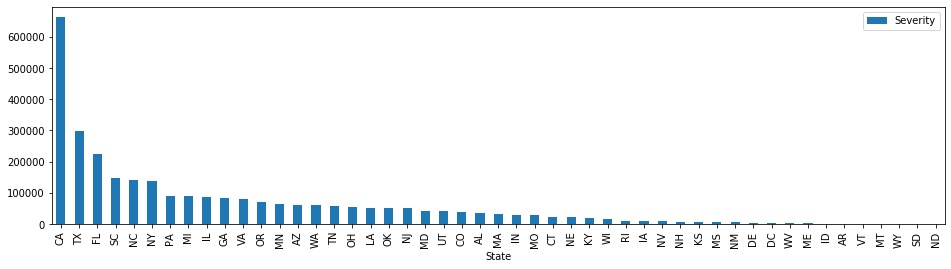

In [6]:
accidents.groupby(['State']).agg({'Severity': 'count'}).sort_values('Severity',ascending=False).plot.bar(figsize=(16,4))

In [7]:
## aggregating data to see number of accidents in different weather conditions##
accidents.groupby(['Weather_Condition']).agg({'ID': 'count'}).sort_values('ID',ascending=False).head(10)

,ID
Weather_Condition,
Clear,808171
Mostly Cloudy,412528
Overcast,382480
Fair,335289
Partly Cloudy,295439
Scattered Clouds,204662
Light Rain,141073
Cloudy,115496
Light Snow,42123


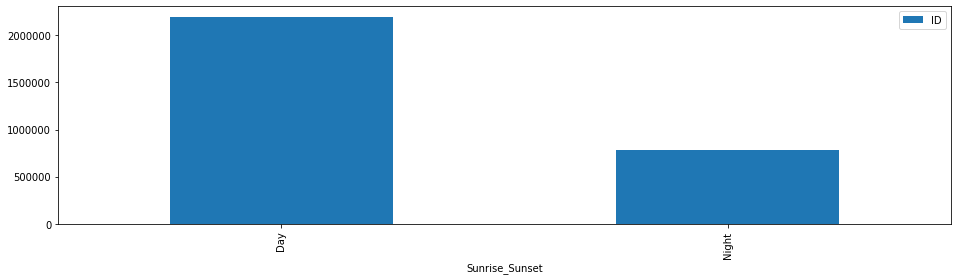

In [8]:
## checking how many accidents happened in day time and night time ##
accidents.groupby(['Sunrise_Sunset']).agg({'ID': 'count'}).sort_values('ID',ascending=False).head().plot.bar(figsize=(16,4))

In [9]:
## to check how many accidents happened at signal##
accidents.groupby(['Traffic_Signal']).agg({'ID': 'count'}).sort_values('ID',ascending=False).head()

,ID
Traffic_Signal,
False,2470952
True,503383


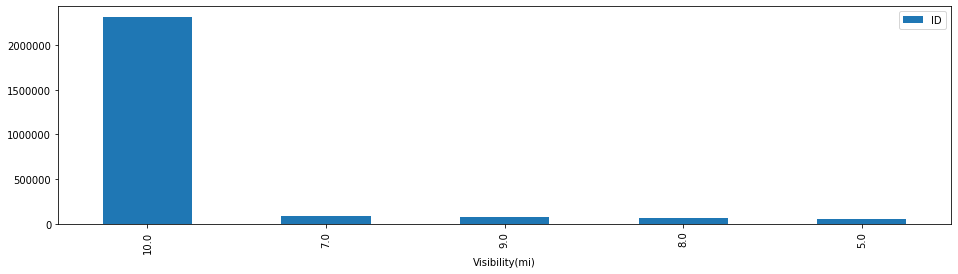

In [10]:
## checking the visibility level, most accidents happened at visibilty 10 miles##
accidents.groupby(['Visibility(mi)']).agg({'ID': 'count'}).sort_values('ID',ascending=False).head().plot.bar(figsize=(16,4))

In [11]:
## accidents happened at stop sign##
accidents.groupby(['Stop']).agg({'ID': 'count'}).sort_values('ID',ascending=False).head()

,ID
Stop,
False,2934175
True,40160


In [12]:
## seting the start_time coumn as index so we can perform resampling method means we can aggregate data by time ##
accidents.set_index('Start_Time', inplace=True)

In [13]:
## checking number of accidents month wise##
accidents.resample('M').agg({'ID': 'count'}).sort_values('ID',ascending=False)

,ID
Start_Time,
2019-10-31,106802
2019-12-31,98210
2019-09-30,87666
2018-10-31,87192
2018-11-30,82079
2019-11-30,81893
2017-08-31,80872
2019-01-31,79275
2017-09-30,76818


In [14]:
## number of accidents yearly##
accidents.resample('y').size()

Start_Time
2015-12-31         1
2016-12-31    410600
2017-12-31    717483
2018-12-31    892615
2019-12-31    953630
2020-12-31         6
Freq: A-DEC, dtype: int64

In [15]:
## checking the city wise accidents of the state of california in ascending order ##
CA=accidents[accidents['State']=='CA']

In [16]:
CA.groupby('City').agg({'ID':'count'}).sort_values('ID',ascending=False).head(10)

,ID
City,
Los Angeles,65851
Sacramento,25657
San Diego,21045
San Jose,17395
Oakland,11602
Riverside,10249
Long Beach,9743
Anaheim,8480
San Francisco,8314


In [17]:
## checking the city wise accidents of the state of texas in ascending order ##
TX=accidents[accidents['State']=='TX']

In [18]:
TX.groupby('City').agg({'ID':'count'}).sort_values('ID',ascending=False).head(10)

,ID
City,
Houston,93245
Austin,58553
Dallas,57823
San Antonio,21613
El Paso,9352
Fort Worth,8746
Arlington,3011
Irving,2697
Mesquite,2180


In [20]:
## number of accidents in Texas, Count wise in ascending order##
TX.groupby('County').agg({'ID':'count'}).sort_values('ID',ascending=False).head(10)

,ID
County,
Harris,99023
Dallas,68149
Travis,63603
Bexar,22206
Tarrant,15859
El Paso,9554
Williamson,3448
Collin,2622
Denton,2189


In [ ]:

## there are a lot of weather conditions in the data set, but we want to know the effect of clear and most bad weather condition##
# so we filter the data and will only work on data with bad weather conditions and clear one##

In [21]:
filt1=accidents['Weather_Condition']=='Clear'
filt2=accidents['Weather_Condition']=='Thunderstorm'
filt3=accidents['Weather_Condition']=='Heavy Rain Showers'
filt4=accidents['Weather_Condition']=='Fog'
filt=filt1|filt2|filt3|filt4
accidents[filt].head()

,ID,Severity,End_Time,City,County,State,Country,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Amenity,Bump,Crossing,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
Start_Time,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-11 07:18:39,A-94,2,2016-02-11 07:48:39,Canal Winchester,Franklin,OH,US,5.0,81.0,10.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Night
2016-02-11 07:53:55,A-98,2,2016-02-11 08:23:55,Dayton,Montgomery,OH,US,9.0,77.0,9.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day
2016-02-11 09:16:13,A-104,2,2016-02-11 10:01:13,Dayton,Montgomery,OH,US,12.0,73.0,10.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day
2016-02-11 10:53:56,A-110,2,2016-02-11 11:23:56,Dayton,Montgomery,OH,US,18.0,54.0,10.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day
2016-02-13 11:17:01,A-132,2,2016-02-13 12:17:01,Bellville,Richland,OH,US,7.0,58.0,10.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day


In [24]:
Accidents=accidents[filt]

In [ ]:
## after filtering the data we named the datafram Accidents and now we will only want to work on state of texas#
# so we would now select the state of texas and name that dataframe as ACC##

In [25]:
# we can see after filtering we are left with only 79,648 records#
filt=Accidents["State"]=="TX"

Accidents[filt].shape

(79648, 24)

In [26]:
Acc=Accidents[filt]

In [27]:
# checking the missing values in new datframe##
Acc.isnull().sum()

ID                     0
Severity               0
End_Time               0
City                   0
County                 0
State                  0
Country                0
Temperature(F)        88
Humidity(%)          186
Visibility(mi)       445
Weather_Condition      0
Amenity                0
Bump                   0
Crossing               0
Junction               0
No_Exit                0
Railway                0
Roundabout             0
Station                0
Stop                   0
Traffic_Calming        0
Traffic_Signal         0
Turning_Loop           0
Sunrise_Sunset         0
dtype: int64

In [28]:
## dropping the records with missing values##
Acc.dropna(subset=['Visibility(mi)','Humidity(%)','Temperature(F)'],how='any',inplace=True)

C:\Users\syeda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
Acc.shape

(79023, 24)

In [30]:
# now we can see no more missing values in the filtered data set#
Acc.isnull().sum()

ID                   0
Severity             0
End_Time             0
City                 0
County               0
State                0
Country              0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
dtype: int64

In [31]:
## checking how many severe acidents hapened out of 79,023##
Acc['Severity'].value_counts()

2    56894
3    21108
4      983
1       38
Name: Severity, dtype: int64

In [57]:
## exporting the new datafram into excel as xlsx file and nameing it projectF, to we will do some regression in SAS on this file##
Acc.to_excel(r'C:\Users\syeda\Desktop\projectF.xlsx', index = False)